# La Transformación Rápida de Fourier

La transformada de Fourier toma una señal del tiempo en el dominio de frecuencia. Una aplicación de la transformada de Fourier es que podemos recuperar las amplitudes y frecuencias de una señal muestreada.

Usaremos el paquete `numpy.fft`. El código subyacente para estas funciones es una versión modificada y traducida por f2c de las rutinas FFTPACK. FFTPACK [1] es un paquete de subprogramas de Fortran para la transformación rápida de Fourier de secuencias periódicas y otras secuencias simétricas. Incluye transformaciones complejas, reales, seno, coseno y cuarto de onda.

Por ejemplo, considere la señal $2 · \cos(4 · 2\pi t) + 5 · \sin (10 · 2\pi t)$ compuesta de un coseno con amplitud 2, frecuencia 4 y un seno con amplitud 5 y frecuencia 10. Usando `rfft` del paquete `numpy.fft`, el siguiente script calcula la transformada discreta de Fourier en la matriz real de muestras mediante el eficiente algoritmo de Transformación rápida de Fourier. Recuperamos las amplitudes y las frecuencias correspondientes de los componentes de nuestra señal. Con matplotlib graficamos el espectro.

2.0*cos(4*2*pi*t)
5.0*sin(10*2*pi*t)


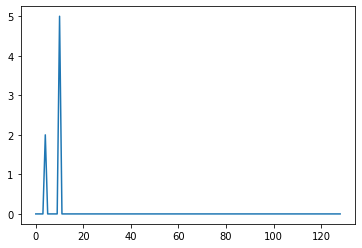

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

f = lambda t: 2*np.cos(4*2*np.pi*t) + 5*np.sin(10*2*np.pi*t) 
n = 256
x = np.arange(0.0,1.0,1.0/n)
s = f(x)
F = np.fft.rfft(s)
m = n / 2
p = lambda z: (abs(np.real(z)) / m, abs(np.imag(z)) / m)
t = p(F)
tol = 1.0e-8

for i in range(0,len(t[0])):
    if t[0][i] > tol:
        print(str(t[0][i]) + '*cos(' + str(i) + '*2*pi*t)')
    if t[1][i] > tol:
        print(str(t[1][i]) + '*sin(' + str(i) + '*2*pi*t)')


plt.plot(abs(F)/m)
plt.show()



y aparece una ventana que muestra el espectro.

### 1. Medir el tiempo de CPU

El costo del algoritmo Fast Fourier Transform en un conjunto de datos de dimensión $n$ es proporcional a $n · log2(n)$. El propósito de esta asignación es determinar experimentalmente si el tiempo de ejecución de la implementación del algoritmo FFT en el paquete `numpy.fft` es de hecho $O(n · log2(n))$.

Para medir el tiempo transcurrido de la CPU en los programas de Python, podemos usar el módulo de tiempo de la siguiente manera:

In [2]:
import time

start_time = time.clock()

# Coloque aqui su codigo

stop_time = time.clock()
cpu_time = stop_time - start_time 
print('cpu time :', cpu_time, 'seconds')

cpu time : 0.00021199999999987895 seconds


/home/melii/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
/home/melii/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


Escriba un script de Python para ejecutar el algoritmo FFT en datos aleatorios de tamaño creciente $n$ (duplicando el valor de $n$ cada vez), teniendo en cuenta el tamaño de la memoria de acceso aleatorio en su computadora. Eventualmente, es posible que deba ejecutar la misma llamada varias veces en un bucle para obtener tiempos que sean lo suficientemente grandes como para darse cuenta. Informe los tiempos de ejecución observados en una tabla. ¿Ves la fórmula $n · log2(n)$ en los tiempos de ejecución observados?

In [3]:
%timeit F = np.fft.rfft(s)

7.3 µs ± 34 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [12]:
arrayTime =[]
for _ in range (1,300):
    n = 256 * 2
    x = np.arange(0.0,1.0,1.0/n)
    s = f(x)
    start_time = time.clock()
    F = np.fft.rfft(s)
    stop_time = time.clock()
    cpu_time = stop_time - start_time 
    arrayTime.append(cpu_time)
    

/home/melii/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/home/melii/.local/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [13]:
arrayTime

[0.00020199999999981344,
 6.700000000137152e-05,
 4.599999999932436e-05,
 4.500000000007276e-05,
 4.500000000007276e-05,
 4.599999999932436e-05,
 5.2999999999414626e-05,
 4.7000000000352316e-05,
 6.30000000008124e-05,
 5.400000000044258e-05,
 5.200000000016303e-05,
 3.6999999998954536e-05,
 3.5999999999702936e-05,
 3.500000000045134e-05,
 3.899999999923409e-05,
 4.199999999876525e-05,
 3.799999999998249e-05,
 3.799999999998249e-05,
 3.700000000073089e-05,
 4.800000000138027e-05,
 2.999999999886427e-05,
 2.6999999999333113e-05,
 3.0999999999892225e-05,
 3.0000000000640625e-05,
 3.0000000000640625e-05,
 3.0999999999892225e-05,
 2.899999999961267e-05,
 2.6999999999333113e-05,
 2.899999999961267e-05,
 2.899999999961267e-05,
 2.6999999999333113e-05,
 2.6000000000081513e-05,
 2.6000000000081513e-05,
 2.6000000000081513e-05,
 2.5999999998305157e-05,
 2.899999999961267e-05,
 2.800000000036107e-05,
 3.1999999999143824e-05,
 3.0999999999892225e-05,
 3.0999999999892225e-05,
 2.800000000036107e-05

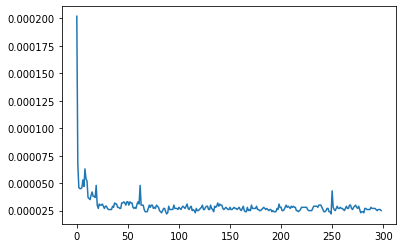

In [14]:
from pylab import plot, show
plot(arrayTime)
show() 

![](TiempoEj.png)

### 2. Eliminación de Ruido de Señales

Una aplicación de la FFT es eliminar el ruido de baja amplitud de las señales. En esta tarea, escribirá un script de Python para simular la eliminación de ruido con la FFT. Los pasos en el script son los siguientes:

1. tomar muestras de una señal exacta;
2. a la señal muestreada, agregue números pequeños;
3. aplique la transformada de Fourier y elimine aquellos componentes que tienen amplitudes bajas; 
4. aplique la transformada inversa de Fourier después de eliminar componentes de baja amplitud;
5. compare el resultado con la señal exacta original.

Puedes probar su script en cualquier dato aleatorio. Para un experimento más realista, puede usar el módulo de sonido de `scitools` y comparar la señal original, la ruidosa y la reconstruida escuchando.

### 1. Tomar muestras de una señal exacta
Señal: $7· \cos(5 · 2\pi t) + 10 \sin (8· 2\pi t)$

6.999999999999999*cos(5*2*pi*t)
10.0*sin(8*2*pi*t)


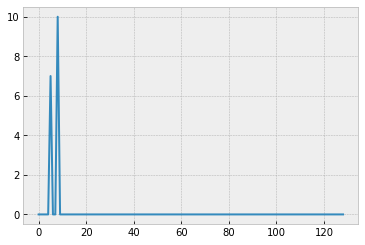

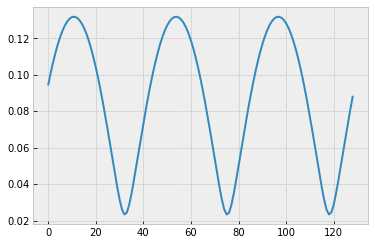

In [75]:
import numpy as np

f = lambda t: 7*np.cos(5*2*np.pi*t) + 10*np.sin(8*2*np.pi*t) 
n = 256
x = np.arange(0.0,1.0,1.0/n)
s = f(x)
F = np.fft.rfft(s)
A = np.fft.ifft(F)
m = n / 2
p = lambda z: (abs(np.real(z)) / m, abs(np.imag(z)) / m)
t = p(F)
tol = 1.0e-8

for i in range(0,len(t[0])):
    if t[0][i] > tol:
        print(str(t[0][i]) + '*cos(' + str(i) + '*2*pi*t)')
    if t[1][i] > tol:
        print(str(t[1][i]) + '*sin(' + str(i) + '*2*pi*t)')

import matplotlib.pyplot as plt 
plt.plot(abs(F)/m)
plt.show()
plt.plot(abs(A)/m)


### 2. A la señal muestreada, agregue números pequeños

6.999999999999999*cos(5*2*pi*t)
10.0*sin(8*2*pi*t)


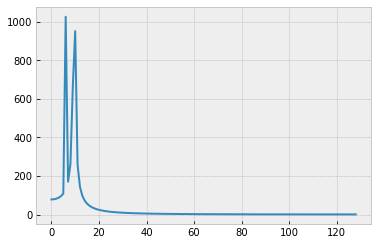

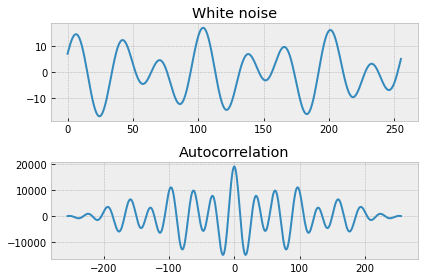

In [88]:
import numpy as np

f = lambda t: 7*np.cos(5*2*np.pi*t) + 10*np.sin(8*2*np.pi*t) 
n = 256
x = np.arange(0.0,1.0,1.0/n)
w = np.arange(0.0,0.2,0.2/n)
a = x+w
s = f(x)
b = f(a)
F = np.fft.rfft(s)
B = np.fft.rfft(b)
autocorr = signal.fftconvolve(s, s[::-1], mode='full')
m = n / 2
p = lambda z: (abs(np.real(z)) / m, abs(np.imag(z)) / m)
t = p(F)
tol = 1.0e-8

for i in range(0,len(t[0])):
    if t[0][i] > tol:
        print(str(t[0][i]) + '*cos(' + str(i) + '*2*pi*t)')
    if t[1][i] > tol:
        print(str(t[1][i]) + '*sin(' + str(i) + '*2*pi*t)')

import matplotlib.pyplot as plt 
#plt.plot(abs(F)/m)
#plt.plot(abs(B)/m)
plt.plot(abs(B))
plt.show()

fig, (ax_orig, ax_mag) = plt.subplots(2, 1)
ax_orig.plot(s)
ax_orig.set_title('White noise')
ax_mag.plot(np.arange(-len(s)+1,len(s)), autocorr)
ax_mag.set_title('Autocorrelation')
fig.tight_layout()


### 3. Aplique la transformada de Fourier y elimine aquellos componentes que tienen amplitudes bajas

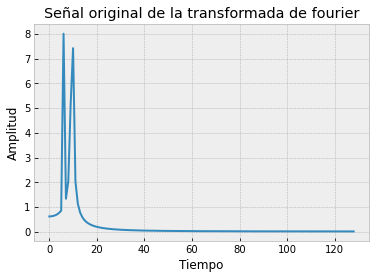

In [81]:
import numpy as np

f = lambda t: 7*np.cos(5*2*np.pi*t) + 10*np.sin(8*2*np.pi*t) 
n = 256
x = np.arange(0.0,1.0,1.0/n)
w = np.arange(0.0,0.2,0.2/n)
s = f(x)
a = x+w
b = f(a)
F = np.fft.rfft(b)
m = n / 2
p = lambda z: (abs(np.real(z)) / m, abs(np.imag(z)) / m)
t = p(F)
tol = 1.0e-8

for i in range(0,len(t[0])):
    if t[0][i] > tol:
        (str(t[0][i]) + '*cos(' + str(i) + '*2*pi*t)')
    if t[1][i] > tol:
        (str(t[1][i]) + '*sin(' + str(i) + '*2*pi*t)')

import matplotlib.pyplot as plt 
plt.title("Señal original de la transformada de fourier");
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.plot(abs(F)/m)
plt.show()

### 4. aplique la transformada inversa de Fourier después de eliminar componentes de baja amplitud;

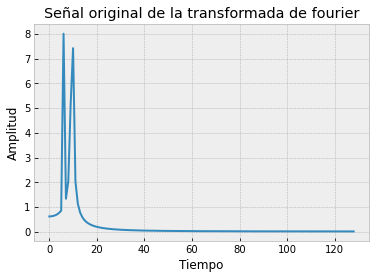

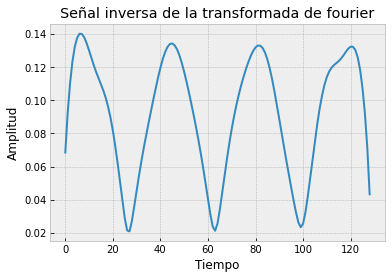

In [82]:
import numpy as np

f = lambda t: 7*np.cos(5*2*np.pi*t) + 10*np.sin(8*2*np.pi*t)
n = 256
x = np.arange(0.0,1.0,1.0/n)
w = np.arange(0.0,0.2,0.2/n)
s = f(x)
a = x+w
b = f(a)
F = np.fft.rfft(b)
A = np.fft.ifft(F)
m = n / 2
p = lambda z: (abs(np.real(z)) / m, abs(np.imag(z)) / m)
t = p(F)
tol = 1.0e-8

for i in range(0,len(t[0])):
    if t[0][i] > tol:
        (str(t[0][i]) + '*cos(' + str(i) + '*2*pi*t)')
    if t[1][i] > tol:
        (str(t[1][i]) + '*sin(' + str(i) + '*2*pi*t)')

import matplotlib.pyplot as plt 
plt.title("Señal original de la transformada de fourier");
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.plot(abs(F)/m)
plt.show()

plt.title("Señal inversa de la transformada de fourier");
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.plot(abs(A)/m)
plt.show()


### 5. compare el resultado con la señal exacta original.

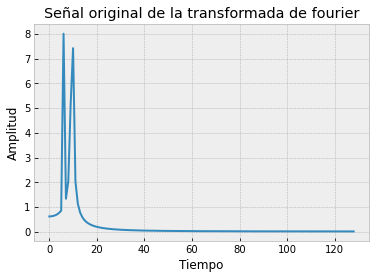

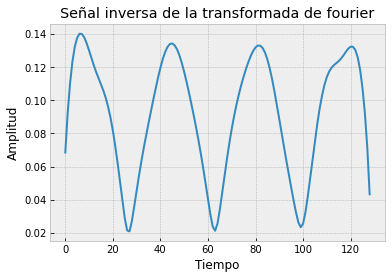

In [84]:
import numpy as np

f = lambda t: 7*np.cos(5*2*np.pi*t) + 10*np.sin(8*2*np.pi*t) 
n = 256
x = np.arange(0.0,1.0,1.0/n)
y = np.arange(0.0,0.2,0.2/n)
u = x+y
s = f(u)

F = np.fft.rfft(s)
A = np.fft.ifft(F)

m = n / 2
p = lambda z: (abs(np.real(z)) / m, abs(np.imag(z)) / m)
t = p(F)
tol = 1.0e-8

for i in range(0,len(t[0])):
    if t[0][i] > tol:
        (str(t[0][i]) + '*cos(' + str(i) + '*2*pi*t)')
    if t[1][i] > tol:
        (str(t[1][i]) + '*sin(' + str(i) + '*2*pi*t)')

        
        
        
plt.title("Señal original de la transformada de fourier");
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.plot(abs(F)/m)
plt.show()

plt.title("Señal inversa de la transformada de fourier");
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.plot(abs(A)/m)
plt.show()

### 3. Convolución rápida

La transformada de Fourier convierte una convolución en un producto de componente. Interpretando las matrices como los vectores de coeficientes de dos polinomios (la entrada i-ésima es el coeficiente de xi), la convolución de los vectores de coeficientes da el vector de coeficientes del producto de los dos polinomios. Usando el FFT rápido, la operación $O(n^2)$ se convierte en $O(n · log2 (n))$. El siguiente script ilustra la convolución de dos matrices rellenadas con ceros suficientes:

Escriba un script de Python para demostrar el beneficio de realizar una convolución usando la FFT, usando tiempos en arreglos suficientemente grandes. Tenga en cuenta que el paquete de señal de scipy contiene la función `fftconvolve`.

In [103]:
import numpy as np
from numpy.fft import rfft, irfft 

a = np.array([6,5,4,0,0,0,0,0]) 
b = np.array([9,8,7,0,0,0,0,0]) 
print(np.convolve(a,b))

A = rfft(a)
B = rfft(b)
C = A * B
print(irfft(C))

[ 54  93 118  67  28   0   0   0   0   0   0   0   0   0   0]
[ 5.40000000e+01  9.30000000e+01  1.18000000e+02  6.70000000e+01
  2.80000000e+01 -7.10542736e-15  0.00000000e+00 -7.10542736e-15]


In [104]:
%timeit A
%timeit B
%timeit C
%timeit irfft(C)

52.3 ns ± 1.11 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
53.7 ns ± 0.86 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
58.3 ns ± 1.99 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
15.2 µs ± 168 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [106]:
import scipy
from scipy import signal

a = np.array([6,5,4,0,0,0,0,0]) 
b = np.array([9,8,7,0,0,0,0,0]) 
z=scipy.signal.convolve(a, b, mode='full')

print(z)


[ 54  93 118  67  28   0   0   0   0   0   0   0   0   0   0]


In [107]:
%timeit z

53 ns ± 0.393 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


#### La convolución rápida de FFT a través de los algoritmos de superposición de adición o guardado de superposición se puede hacer en memoria limitada utilizando una FFT que es solo un pequeño múltiplo (como 2X) más grande que la respuesta al impulso. Rompe la FFT larga en FFT más cortas, pero con relleno cero, correctamente superpuestas.
#### Incluso con la superposición de gastos generales, O (NlogN) vencerá a M * N en eficiencia para N y M. suficientemente grandes

## Referencia

[1] P.N. Swarztrauber. Vectorizing the FFTs. In Parallel Computations, edited by G. Rodrigue, pages 51–83, Academic Press, 1982.